In [36]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Load some house sales data

In [37]:
df = pd.read_csv('home_data.csv')

In [38]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# exploring the data for housing sales

<IPython.core.display.Javascript object>


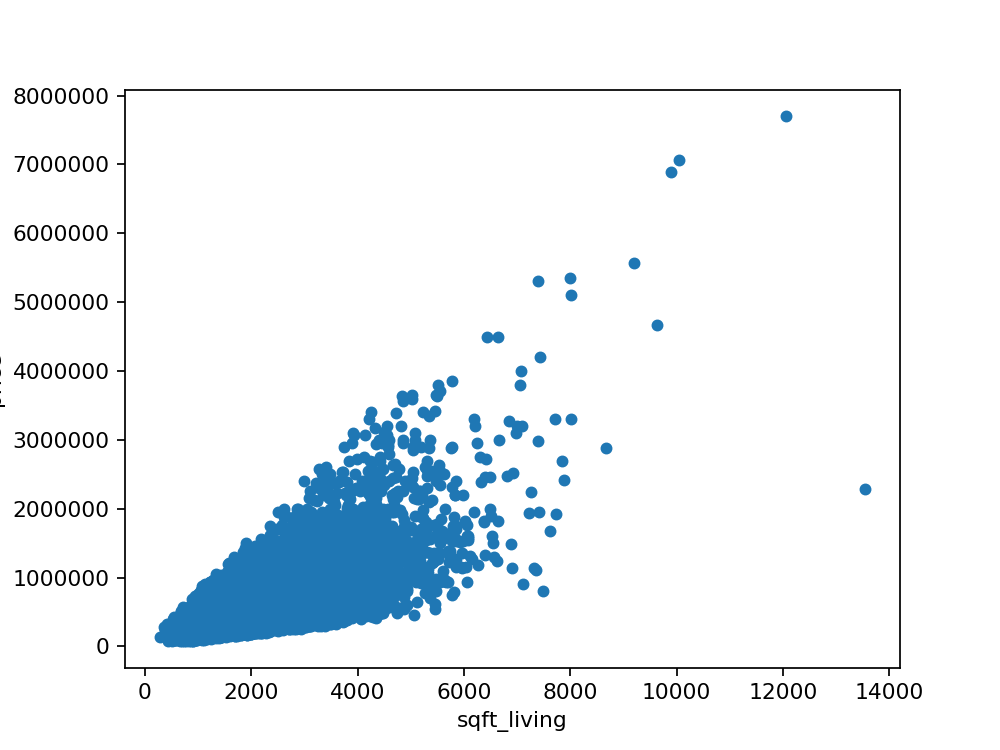

In [39]:
%matplotlib notebook
df.plot(x='sqft_living',y='price', kind='scatter')

# create a simple regression model of sqft_living to price

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('price', axis=1), df['price'], train_size=0.8, random_state=0)

# build the regression model

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
model = LinearRegression()
model.fit(X_train['sqft_living'].reshape(-1, 1), y_train.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# evaluate the simple model

In [44]:
y_test.mean()

529242.6106870229

In [45]:
from sklearn import metrics
pred = model.predict(X_test['sqft_living'].reshape(-1, 1))
np.sqrt(metrics.mean_squared_error(y_test, pred))

248879.06143647005

# Let's show what our predictions look like

In [46]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


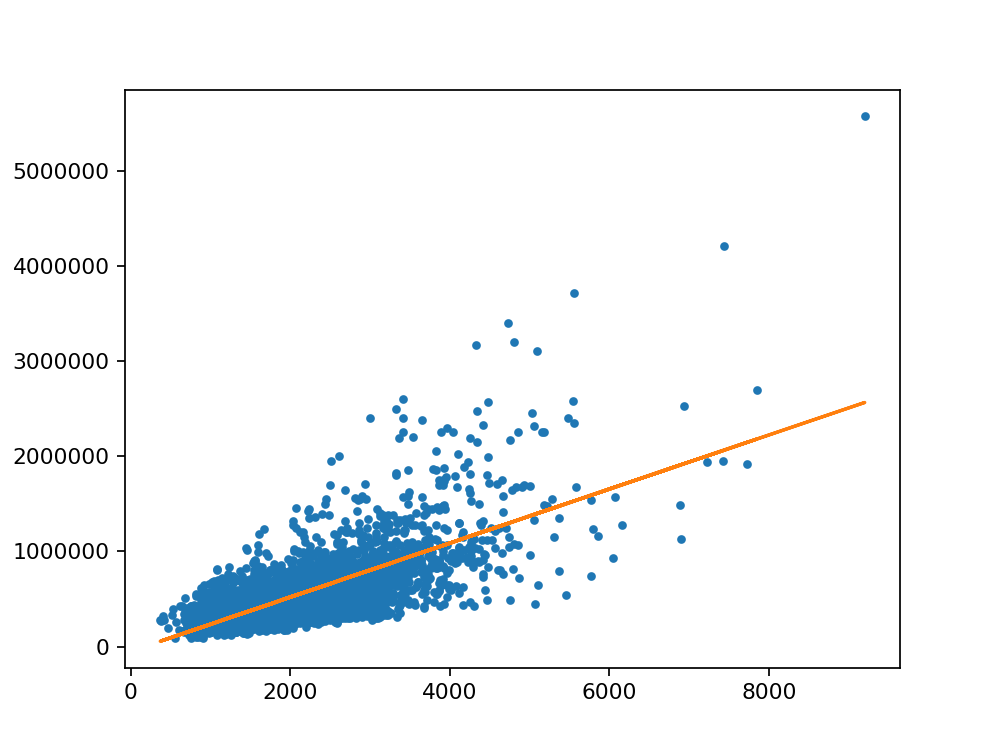

In [47]:
plt.figure()
plt.plot(X_test['sqft_living'], y_test, '.')
plt.plot(X_test['sqft_living'], pred, '-')

In [48]:
print('intercept', model.intercept_)
print('coefficients', model.coef_)

intercept [-48257.06345556]
coefficients [[283.96855737]]


# Explore other features in the data

In [49]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [50]:
X_train[my_features].head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode
5268,3,1.0,1570,5510,1.0,98115
16909,3,2.5,1780,11000,1.0,98006
16123,3,1.5,1090,9862,1.0,98074
12181,4,2.5,2210,7079,2.0,98031
12617,3,2.5,1800,4763,2.0,98119


In [51]:
import seaborn as sns

<IPython.core.display.Javascript object>


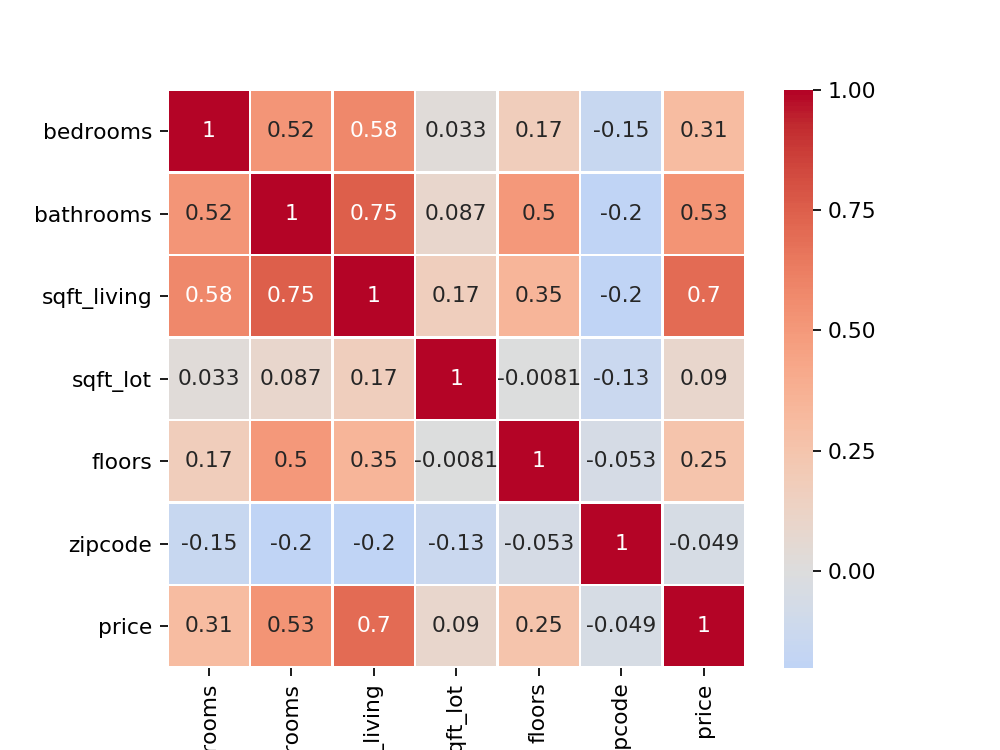

In [52]:
corrmat = pd.concat((X_train[my_features], y_train), axis=1).corr()
plt.figure()
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True, cmap=plt.cm.coolwarm, center=0)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [53]:
df = pd.concat((X_train['zipcode'], y_train), axis=1)
df = df.set_index('zipcode')
df = df.sort_index()


<IPython.core.display.Javascript object>


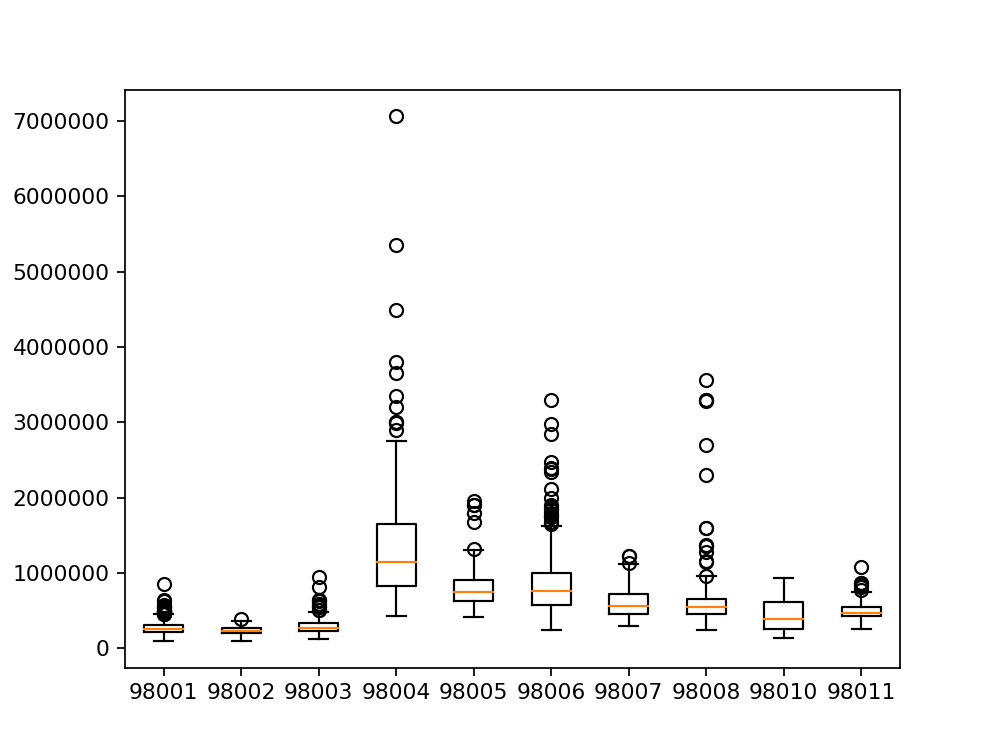

In [54]:
plt.figure()
indexs = sorted(list(set(df.index)))
bplots = plt.boxplot([df.loc[index] for index in indexs[:10]], labels=[index for index in indexs[:10]])

# Build a regression model with more features

In [55]:
my_features_model = LinearRegression()
my_features_model.fit(X_train[my_features], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
print(np.sqrt(metrics.mean_squared_error(y_train, my_features_model.predict(X_train[my_features]))))
print(np.sqrt(metrics.mean_squared_error(y_test, my_features_model.predict(X_test[my_features]))))

258524.6848483353
244004.77443104296


# Apply learned models to predict prices of 3 houses

In [57]:
df = pd.read_csv('home_data.csv')
house1 = df[df['id'] == 5309101200]
house1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,20140605T000000,620000,4,2.25,2400,5350,1.5,0,0,...,7,1460,940,1929,0,98117,47.6763,-122.37,1250,4880


In [58]:
house1['price']

1054    620000
Name: price, dtype: int64

In [59]:
int(model.predict(house1['sqft_living']))

633267

In [60]:
int(my_features_model.predict(house1[my_features]))

637556

# Prediction for a second, fancier house

In [61]:
house2 = df[df['id']==1925069082]

In [62]:
house2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1361,1925069082,20150511T000000,2200000,5,4.25,4640,22703,2.0,1,4,...,8,2860,1780,1952,0,98052,47.6393,-122.097,3140,14200


In [63]:
house2['price']

1361    2200000
Name: price, dtype: int64

In [64]:
int(model.predict(house2['sqft_living']))

1269357

In [66]:
int(my_features_model.predict(house2[my_features]))

1274443

# Question1

In [74]:
s = df.groupby('zipcode')['price'].mean()
s.max()

2160606.6

# Question2

In [77]:
df[(df['sqft_living']>2000) & (df['sqft_living']<4000)]['id'].count() / df['id'].count()

0.4215518437977143

# Question3

In [78]:
advanced_features =[
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house				
'grade', # measure of quality of construction				
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

In [79]:
advanced_model = LinearRegression()
advanced_model.fit(X_train[advanced_features], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [85]:
ad = np.sqrt(metrics.mean_squared_error(y_train, advanced_model.predict(X_train[advanced_features])))
ad

203805.41055524026

In [87]:
my = np.sqrt(metrics.mean_squared_error(y_train ,my_features_model.predict(X_train[my_features])))
my

258524.6848483353

In [88]:
my-ad

54719.27429309505